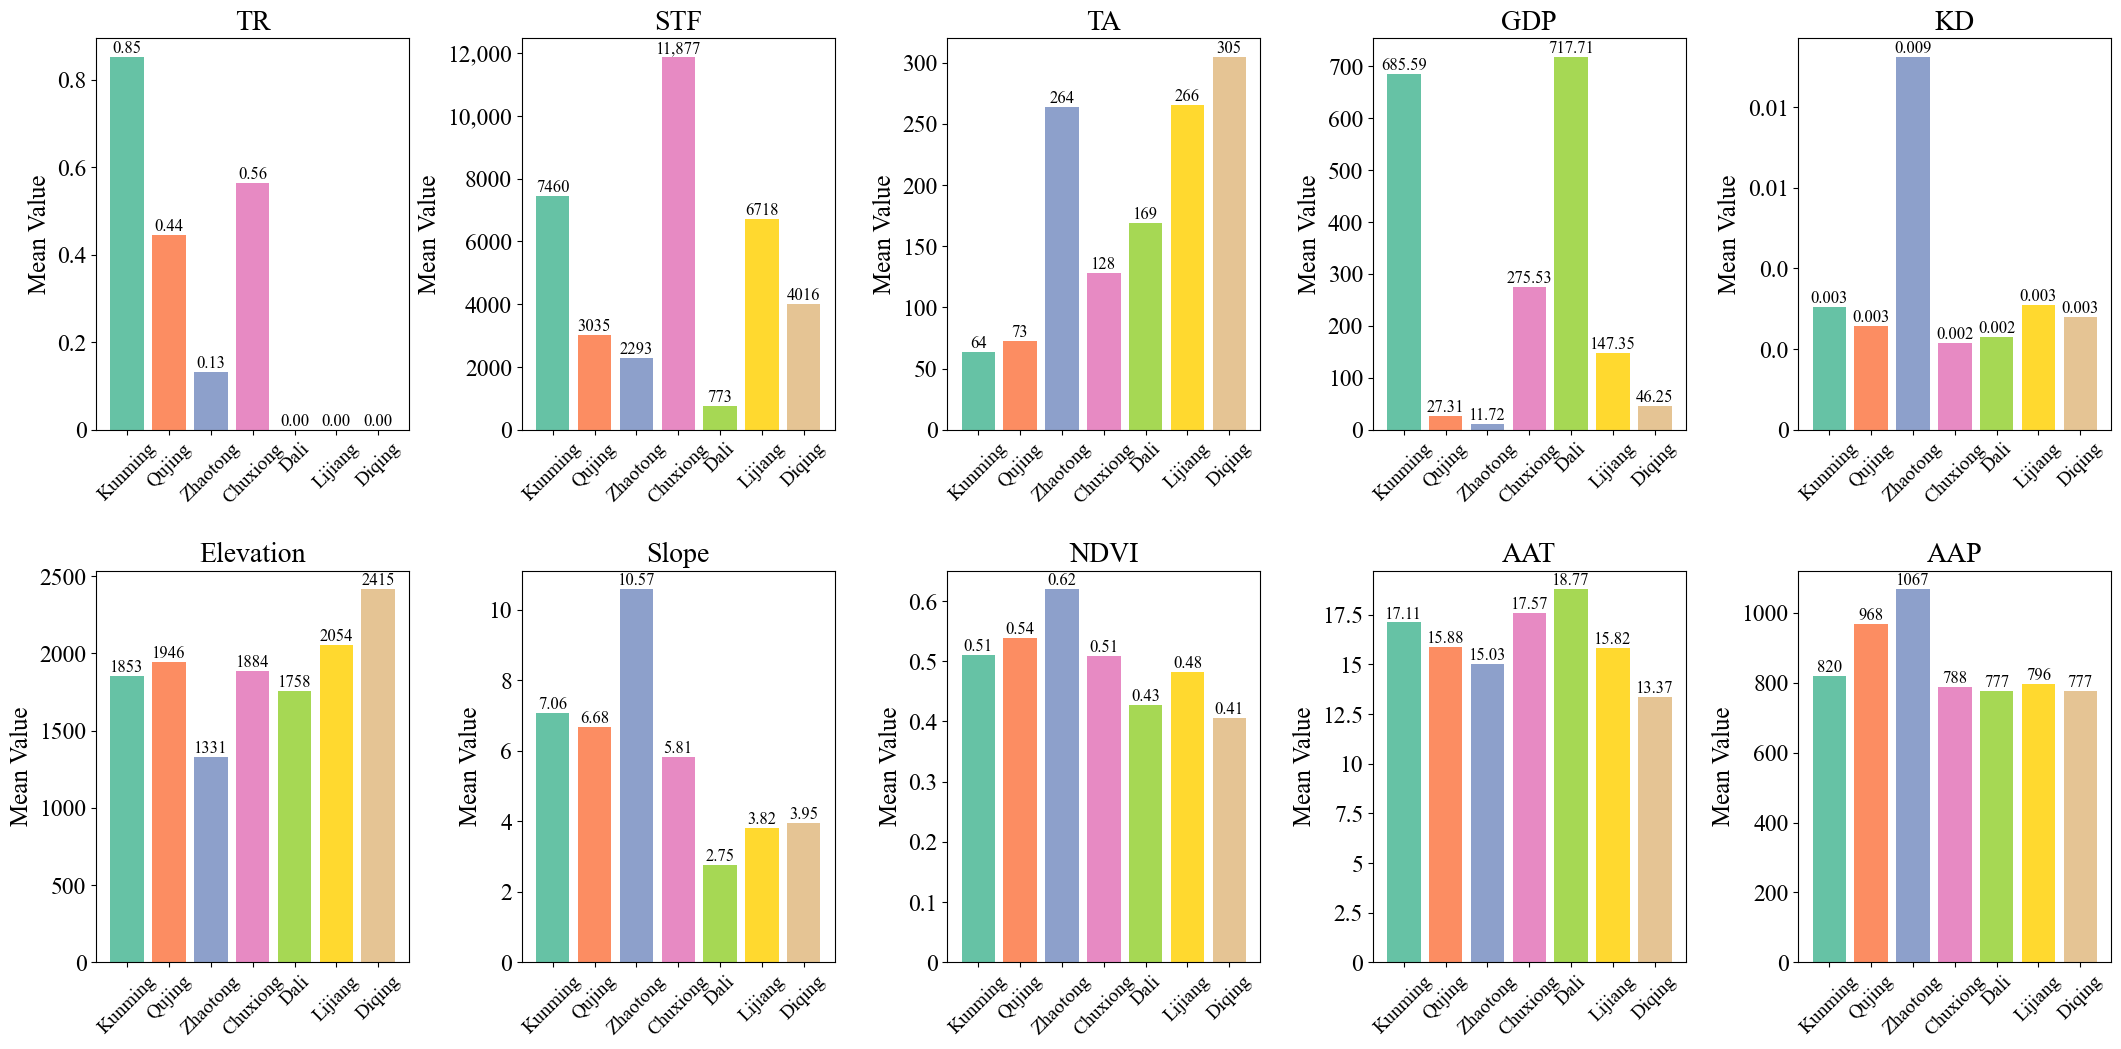

In [ ]:
# ÊåáÊ†áÊï∞ÂÄºÂàÜÂ∏ÉÊ†ºÂ±ÄÁªüËÆ°
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.patches import Patch
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
# zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# ËØªÂèñExcelÊñá‰ª∂
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# ÈúÄË¶ÅÁªüËÆ°ÁöÑÂ≠óÊÆµ
fields = [
    "TR", "STF", "TA", "GDP", "KD",
    "Elevation", "Slope", "NDVI", "AAT", "AAP"
]

# ÂàÜÁªÑÊ±ÇÂùáÂÄº
grouped = df.groupby('ÂüéÂ∏Ç')[fields].mean()

# ÊåâÊåáÂÆöÂüéÂ∏ÇÈ°∫Â∫èÊéíÂ∫è
city_order = ['Kunming', 'Qujing', 'Zhaotong', 'Chuxiong', 'Dali', 'Lijiang', 'Diqing']
grouped = grouped.reindex(city_order)

# ‰ΩøÁî® SCI È£éÊ†ºÈÖçËâ≤ÔºàSet2Ë∞ÉËâ≤ÊùøÔºâ
palette = sns.color_palette("Set2", n_colors=len(grouped.index))
city_list = grouped.index.tolist()
color_map = {city: palette[i] for i, city in enumerate(city_list)}

# y ËΩ¥ÂàªÂ∫¶Ê†ºÂºèÂåñÂáΩÊï∞ÔºöÊï¥Êï∞ ‚â•10000 Âä†ÂçÉ‰ΩçÂàÜÈöîÁ¨¶
def y_formatter(x, pos):
    if float(x).is_integer():  # Êï¥Êï∞
        val = int(round(x))
        if abs(val) >= 10000:
            return f"{val:,}"
        else:
            return str(val)
    else:  # Â∞èÊï∞
        return str(round(x, 2))  # ‰øùÁïô 2 ‰Ωç

# ÂàõÂª∫2Ë°å5ÂàóÂ≠êÂõæ
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(26, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.36, wspace=0.36)  # Ë°åÈó¥Ë∑ùÂíåÂàóÈó¥Ë∑ùÂä†Â§ß

# ÁªòÂõæ
for i, field in enumerate(fields):
    ax = axes[i]
    data = grouped[field]
    bars = ax.bar(data.index, data.values, color=[color_map[city] for city in data.index])
    
    ax.set_title(field, fontsize=20)  # Â≠êÂõæÊ†áÈ¢ò
    ax.set_ylabel('Mean Value', fontsize=18)
    ax.set_xlabel('', fontsize=16)
    
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels(data.index, rotation=45, fontsize=14)  # xËΩ¥Ê†áÁ≠æÊõ¥Â§ß
    ax.tick_params(axis='y', labelsize=17)  # yËΩ¥ÂàªÂ∫¶Êõ¥Â§ß

    # ËÆæÁΩÆ y ËΩ¥ÂàªÂ∫¶Ê†ºÂºè
    ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

    # Ê∑ªÂä†Êü±È°∂Êï∞ÂÄºÊ†áÁ≠æ
    for bar in bars:
        height = bar.get_height()

        if field == 'KD':  # ‰∏â‰ΩçÂ∞èÊï∞
            label = f"{round(height, 3):.3f}"
        elif field in ['STF', 'AAP', 'Elevation', 'TA']:  # Êï¥Êï∞ÊòæÁ§∫
            val = int(round(height))
            if abs(val) >= 10000:
                label = f"{val:,}"
            else:
                label = str(val)
        else:  # ‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞
            label = f"{round(height, 2):.2f}"

        ax.text(bar.get_x() + bar.get_width() / 2, height, label,
                ha='center', va='bottom', fontsize=12)

# Âà†Èô§Â§ö‰ΩôÂ≠êÂõæ
for j in range(len(fields), len(axes)):
    fig.delaxes(axes[j])

# ‰øùÂ≠ò‰∏∫È´òÊ∏ÖÂõæ
plt.savefig("Ê†ºÂ±ÄÁªüËÆ°Âõæ.png", dpi=600, bbox_inches='tight')
plt.show()


d:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Á≥ªÁªüÊâæ‰∏çÂà∞ÊåáÂÆöÁöÑÊñá‰ª∂„ÄÇ
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^

üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:
AAT: 0.3315
TR: 0.2403
AAP: 0.2118
TA: 0.1224
NDVI: 0.0675
KD: 0.0255
Elevation: 0.0007
Slope: 0.0002
GDP: 0.0001
STF: 0.0000


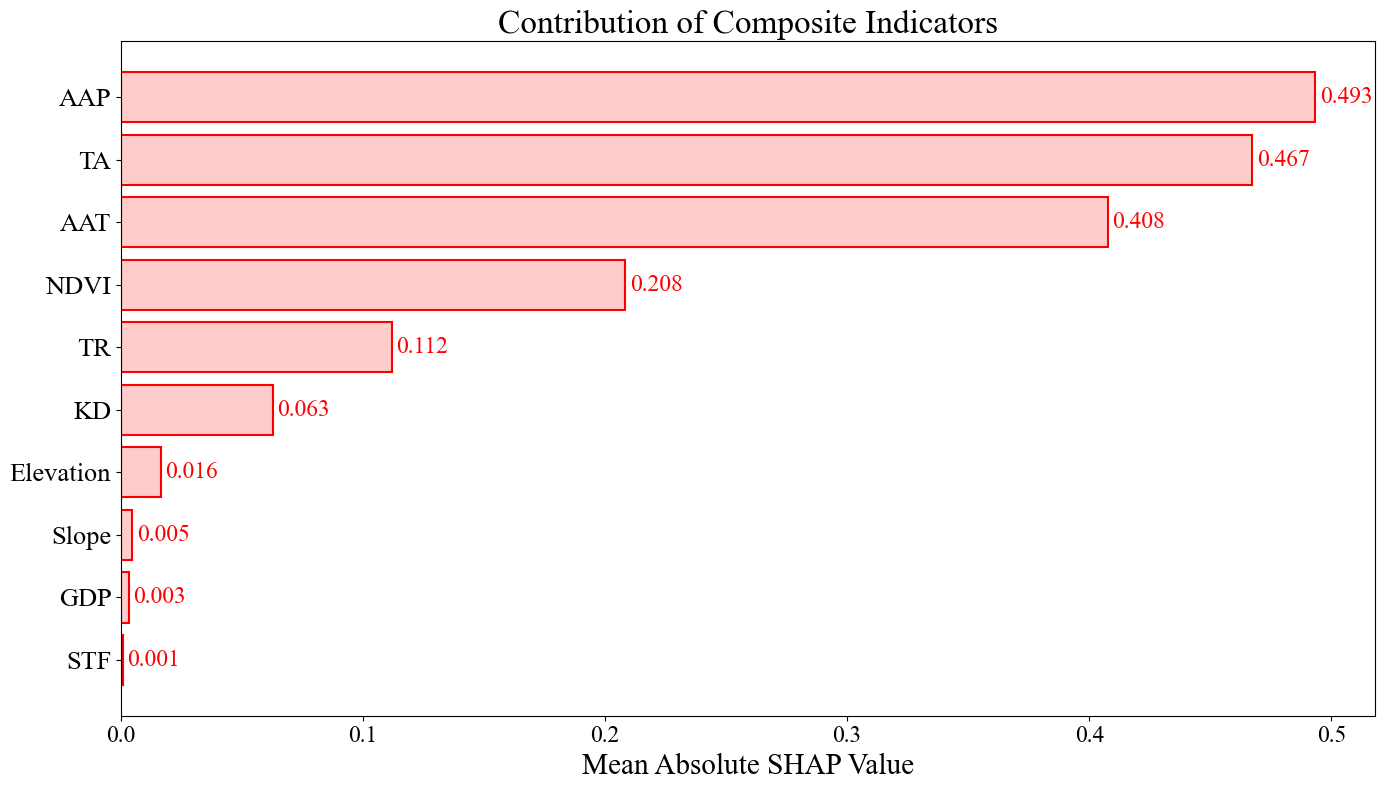

In [ ]:
# Ê∑∑ÂêàÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûê
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager

# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "TA", "KD", "GDP", "AAT",
    "NDVI", "AAP", "Elevation", "Slope", "TR", "STF"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["TA", "Slope"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# 4. Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# 5. Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# 6. KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# 7. XGBoostËÆ≠ÁªÉÔºåËÆ°ÁÆóÁâπÂæÅÊùÉÈáç
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)
feature_importances = xgb_model.feature_importances_

# 8. ËæìÂá∫ÁâπÂæÅÊùÉÈáçÔºàÊåâÂ§ßÂ∞èÊéíÂ∫èÔºâ
feature_weight_dict = dict(zip(selected_cols, feature_importances))
sorted_weights = sorted(feature_weight_dict.items(), key=lambda x: x[1], reverse=True)

print("üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:")
for feature, weight in sorted_weights:
    print(f"{feature}: {weight:.4f}")

# 9. Âä†ÊùÉÂæóÂàÜÔºà‰ΩøÁî® Min-Max Ê†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆÔºå‰∏çÊòØÂπ≥ÁßªÂêéÁöÑÔºâ
weighted_score = data_std @ feature_importances

# ‚úÖ ‰πò‰ª• 100 ÊîæÂ§ßÂæóÂàÜ
weighted_score = weighted_score * 100

# 10. Ê∑ªÂä†ÂæóÂàÜÂàóÂπ∂ÂÜôÂõûExcel
df["ÊÄªÂàÜÂÄº"] = weighted_score
df.to_excel(file_path, index=False)

# ‚Äî‚Äî‚Äî Êñ∞Â¢ûÔºöÂü∫‰∫éËÆ≠ÁªÉÂ•ΩÁöÑxgbÊ®°ÂûãÂÅöSHAPËß£Èáä ‚Äî‚Äî‚Äî
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄºÔºàÈáçË¶ÅÂ∫¶Ôºâ
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâÔºåÁ°Æ‰øùÈ°∂ÈÉ®ÊúÄÂ§ß
sorted_idx = np.argsort(mean_abs_shap)[::-1]
mean_abs_shap_sorted = mean_abs_shap[sorted_idx]
features_sorted = [features[i] for i in sorted_idx]

# ÂáÜÂ§á‰∏≠ÊñáÂÆã‰ΩìÂíåTimes New RomanÂ≠ó‰ΩìÔºàWindowsÁ≥ªÁªüÔºâ
font_zh = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
font_en = fm.FontProperties(family='Times New Roman')

# ÁªòÂà∂Ëá™ÂÆö‰πâSHAPÁâπÂæÅÈáçË¶ÅÊÄßÊ®™ÂêëÊù°ÂΩ¢ÂõæÔºàËá™‰∏äÂêë‰∏ãÊéíÂ∫èÔºâ
fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.barh(
    features_sorted[::-1],           # ÂèçËΩ¨È°∫Â∫èÔºå‰øùËØÅÊúÄÂ§ßÂÄºÂú®‰∏ä
    mean_abs_shap_sorted[::-1],      # ÂèçËΩ¨È°∫Â∫èÂØπÂ∫î
    color='#FFCCCC',                 # ÊµÖÁ∫¢Ëâ≤Â°´ÂÖÖ
    edgecolor='red',                 # Á∫¢Ëâ≤ËæπÊ°Ü
    linewidth=1.5
)

# Âú®Êü±Â§¥ÔºàÊù°ÂΩ¢Âè≥Á´ØÔºâÊ∑ªÂä†SHAPÂÄºÊ†áÁ≠æÔºå‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞
for bar, val in zip(bars, mean_abs_shap_sorted[::-1]):
    width = bar.get_width()
    ax.text(
        width + 0.002,                # Á®çÂæÆÂêëÂè≥ÂÅèÁßª‰∏ÄÁÇπÔºåÈÅøÂÖçÈáçÂè†Êü±Â≠ê
        bar.get_y() + bar.get_height() / 2,
        f"{val:.3f}",
        ha='left', va='center',
        fontproperties=font_en,
        fontsize=17,
        color='red'
    )

# ËÆæÁΩÆÂ≠ó‰ΩìÔºàyËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÁî®‰∏≠ÊñáÂÆã‰ΩìÔºâ
ax.set_yticks(np.arange(len(features_sorted)))
ax.set_yticklabels(features_sorted[::-1], fontsize=19)

# xËΩ¥Ê†áÁ≠æ
ax.set_xlabel("Mean Absolute SHAP Value", fontsize=21)
# xËΩ¥ÂàªÂ∫¶Â≠ó‰ΩìÂ§ßÂ∞èËÆæÁΩÆ
ax.tick_params(axis='x', labelsize=17)  # ËøôÈáåÁöÑ16ÂèØ‰ª•Ê†πÊçÆÈúÄË¶ÅË∞ÉÂ§ßÊàñË∞ÉÂ∞è

# Ê†áÈ¢ò
ax.set_title("Contribution of Composite Indicators", fontsize=24)

# Êó†ÁΩëÊ†ºÁ∫ø
ax.grid(False)

plt.tight_layout()
plt.savefig("all_shap_feature_importance_600dpi.png", dpi=600)
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:
KD: 0.5810
TA: 0.3830
TR: 0.0360
GDP: 0.0000
STF: 0.0000


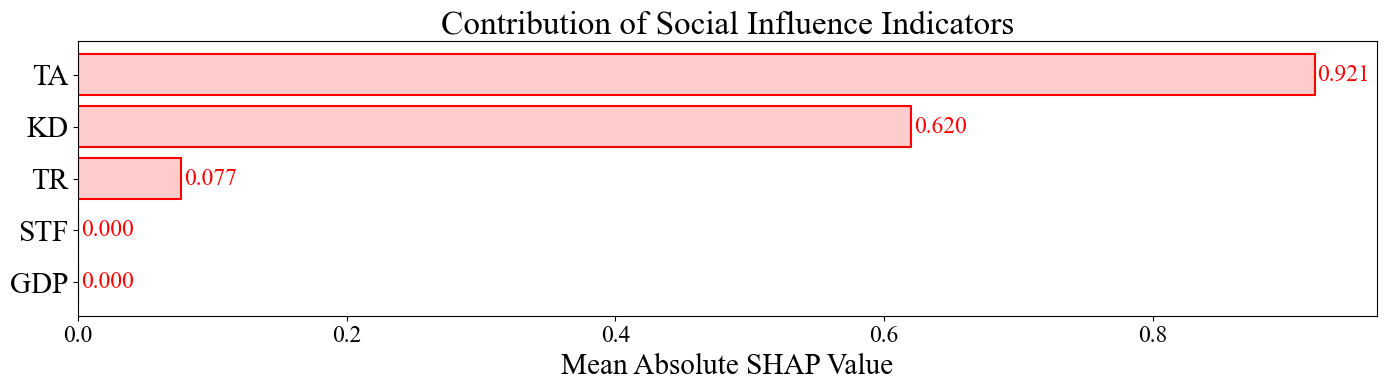

In [ ]:
# Á§æ‰ºöÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûê
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Times New Roman'

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "TA", "KD", "GDP", "TR", "STF"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["TA"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# 4. Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# 5. Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# 6. KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# 7. XGBoostËÆ≠ÁªÉÔºåËÆ°ÁÆóÁâπÂæÅÊùÉÈáç
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)
feature_importances = xgb_model.feature_importances_

# 8. ËæìÂá∫ÁâπÂæÅÊùÉÈáçÔºàÊåâÂ§ßÂ∞èÊéíÂ∫èÔºâ
feature_weight_dict = dict(zip(selected_cols, feature_importances))
sorted_weights = sorted(feature_weight_dict.items(), key=lambda x: x[1], reverse=True)

print("üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:")
for feature, weight in sorted_weights:
    print(f"{feature}: {weight:.4f}")

# 9. Âä†ÊùÉÂæóÂàÜÔºà‰ΩøÁî® Min-Max Ê†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆÔºå‰∏çÊòØÂπ≥ÁßªÂêéÁöÑÔºâ
weighted_score = data_std @ feature_importances

# ‚úÖ ‰πò‰ª• 100 ÊîæÂ§ßÂæóÂàÜ
weighted_score = weighted_score * 100

# 10. Ê∑ªÂä†ÂæóÂàÜÂàóÂπ∂ÂÜôÂõûExcel
df["‰∫∫‰∏∫ÊÄªÂàÜÂÄº"] = weighted_score
df.to_excel(file_path, index=False)

# ‚Äî‚Äî‚Äî Êñ∞Â¢ûÔºöÂü∫‰∫éËÆ≠ÁªÉÂ•ΩÁöÑxgbÊ®°ÂûãÂÅöSHAPËß£Èáä ‚Äî‚Äî‚Äî
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄºÔºàÈáçË¶ÅÂ∫¶Ôºâ
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâÔºåÁ°Æ‰øùÈ°∂ÈÉ®ÊúÄÂ§ß
sorted_idx = np.argsort(mean_abs_shap)[::-1]
mean_abs_shap_sorted = mean_abs_shap[sorted_idx]
features_sorted = [features[i] for i in sorted_idx]

# ÂáÜÂ§á‰∏≠ÊñáÂÆã‰ΩìÂíåTimes New RomanÂ≠ó‰ΩìÔºàWindowsÁ≥ªÁªüÔºâ
# font_zh = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
# font_en = fm.FontProperties(family='Times New Roman')

# ÁªòÂà∂Ëá™ÂÆö‰πâSHAPÁâπÂæÅÈáçË¶ÅÊÄßÊ®™ÂêëÊù°ÂΩ¢ÂõæÔºàËá™‰∏äÂêë‰∏ãÊéíÂ∫èÔºâ
fig, ax = plt.subplots(figsize=(14, 4))

bars = ax.barh(
    features_sorted[::-1],           # ÂèçËΩ¨È°∫Â∫èÔºå‰øùËØÅÊúÄÂ§ßÂÄºÂú®‰∏ä
    mean_abs_shap_sorted[::-1],      # ÂèçËΩ¨È°∫Â∫èÂØπÂ∫î
    color='#FFCCCC',                 # ÊµÖÁ∫¢Ëâ≤Â°´ÂÖÖ
    edgecolor='red',                 # Á∫¢Ëâ≤ËæπÊ°Ü
    linewidth=1.5
)

# Âú®Êü±Â§¥ÔºàÊù°ÂΩ¢Âè≥Á´ØÔºâÊ∑ªÂä†SHAPÂÄºÊ†áÁ≠æÔºå‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞
for bar, val in zip(bars, mean_abs_shap_sorted[::-1]):
    width = bar.get_width()
    ax.text(
        width + 0.002,                # Á®çÂæÆÂêëÂè≥ÂÅèÁßª‰∏ÄÁÇπÔºåÈÅøÂÖçÈáçÂè†Êü±Â≠ê
        bar.get_y() + bar.get_height() / 2,
        f"{val:.3f}",
        ha='left', va='center',
        fontproperties=font_en,
        fontsize=17,
        color='red'
    )

# ËÆæÁΩÆÂ≠ó‰ΩìÔºàyËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÁî®‰∏≠ÊñáÂÆã‰ΩìÔºâ
ax.set_yticks(np.arange(len(features_sorted)))
ax.set_yticklabels(features_sorted[::-1], fontsize=21)

# xËΩ¥Ê†áÁ≠æ
ax.set_xlabel("Mean Absolute SHAP Value", fontsize=21)
# xËΩ¥ÂàªÂ∫¶Â≠ó‰ΩìÂ§ßÂ∞èËÆæÁΩÆ
ax.tick_params(axis='x', labelsize=17)  # ËøôÈáåÁöÑ16ÂèØ‰ª•Ê†πÊçÆÈúÄË¶ÅË∞ÉÂ§ßÊàñË∞ÉÂ∞è

# Ê†áÈ¢ò
ax.set_title("Contribution of Social Influence Indicators", fontsize=24)

# Êó†ÁΩëÊ†ºÁ∫ø
ax.grid(False)

plt.tight_layout()
plt.savefig("people_shap_feature_importance_600dpi.png", dpi=600)
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:
AAT: 0.4238
AAP: 0.3174
Slope: 0.2164
NDVI: 0.0299
Elevation: 0.0124


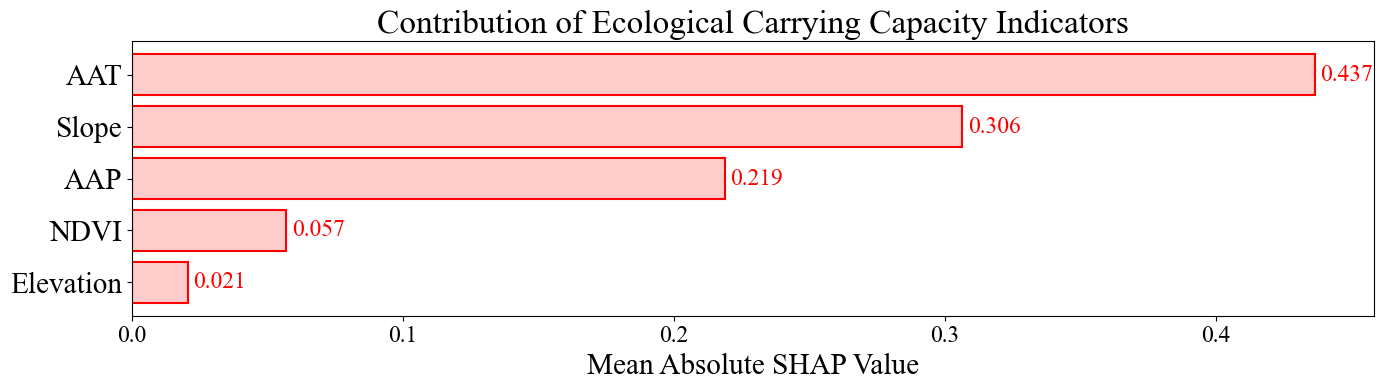

In [ ]:
# ÁîüÊÄÅÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûê
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Times New Roman'

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "AAT", "NDVI", "AAP", "Elevation", "Slope"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["Slope"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# 4. Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# 5. Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# 6. KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# 7. XGBoostËÆ≠ÁªÉÔºåËÆ°ÁÆóÁâπÂæÅÊùÉÈáç
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)
feature_importances = xgb_model.feature_importances_

# 8. ËæìÂá∫ÁâπÂæÅÊùÉÈáçÔºàÊåâÂ§ßÂ∞èÊéíÂ∫èÔºâ
feature_weight_dict = dict(zip(selected_cols, feature_importances))
sorted_weights = sorted(feature_weight_dict.items(), key=lambda x: x[1], reverse=True)

print("üìä ÁâπÂæÅÊùÉÈáçÔºà‰ªéÈ´òÂà∞‰ΩéÔºâ:")
for feature, weight in sorted_weights:
    print(f"{feature}: {weight:.4f}")

# 9. Âä†ÊùÉÂæóÂàÜÔºà‰ΩøÁî® Min-Max Ê†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆÔºå‰∏çÊòØÂπ≥ÁßªÂêéÁöÑÔºâ
weighted_score = data_std @ feature_importances

# ‚úÖ ‰πò‰ª• 100 ÊîæÂ§ßÂæóÂàÜ
weighted_score = weighted_score * 100

# 10. Ê∑ªÂä†ÂæóÂàÜÂàóÂπ∂ÂÜôÂõûExcel
df["ÁîüÊÄÅÊÄªÂàÜÂÄº"] = weighted_score
df.to_excel(file_path, index=False)

# ‚Äî‚Äî‚Äî Êñ∞Â¢ûÔºöÂü∫‰∫éËÆ≠ÁªÉÂ•ΩÁöÑxgbÊ®°ÂûãÂÅöSHAPËß£Èáä ‚Äî‚Äî‚Äî
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄºÔºàÈáçË¶ÅÂ∫¶Ôºâ
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâÔºåÁ°Æ‰øùÈ°∂ÈÉ®ÊúÄÂ§ß
sorted_idx = np.argsort(mean_abs_shap)[::-1]
mean_abs_shap_sorted = mean_abs_shap[sorted_idx]
features_sorted = [features[i] for i in sorted_idx]

# ÂáÜÂ§á‰∏≠ÊñáÂÆã‰ΩìÂíåTimes New RomanÂ≠ó‰ΩìÔºàWindowsÁ≥ªÁªüÔºâ
# font_zh = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
# ÂÖ®Â±ÄÂ≠ó‰ΩìËÆæÁΩÆ‰∏∫Times New Roman


# ÁªòÂà∂Ëá™ÂÆö‰πâSHAPÁâπÂæÅÈáçË¶ÅÊÄßÊ®™ÂêëÊù°ÂΩ¢ÂõæÔºàËá™‰∏äÂêë‰∏ãÊéíÂ∫èÔºâ
fig, ax = plt.subplots(figsize=(14, 4))

bars = ax.barh(
    features_sorted[::-1],           # ÂèçËΩ¨È°∫Â∫èÔºå‰øùËØÅÊúÄÂ§ßÂÄºÂú®‰∏ä
    mean_abs_shap_sorted[::-1],      # ÂèçËΩ¨È°∫Â∫èÂØπÂ∫î
    color='#FFCCCC',                 # ÊµÖÁ∫¢Ëâ≤Â°´ÂÖÖ
    edgecolor='red',                 # Á∫¢Ëâ≤ËæπÊ°Ü
    linewidth=1.5
)

# Âú®Êü±Â§¥ÔºàÊù°ÂΩ¢Âè≥Á´ØÔºâÊ∑ªÂä†SHAPÂÄºÊ†áÁ≠æÔºå‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞
for bar, val in zip(bars, mean_abs_shap_sorted[::-1]):
    width = bar.get_width()
    ax.text(
        width + 0.002,                # Á®çÂæÆÂêëÂè≥ÂÅèÁßª‰∏ÄÁÇπÔºåÈÅøÂÖçÈáçÂè†Êü±Â≠ê
        bar.get_y() + bar.get_height() / 2,
        f"{val:.3f}",
        ha='left', va='center',
        fontproperties=font_en,
        fontsize=17,
        color='red'
    )

# ËÆæÁΩÆÂ≠ó‰ΩìÔºàyËΩ¥ÂàªÂ∫¶Ê†áÁ≠æÁî®‰∏≠ÊñáÂÆã‰ΩìÔºâ
ax.set_yticks(np.arange(len(features_sorted)))
ax.set_yticklabels(features_sorted[::-1], fontsize=21)

# xËΩ¥Ê†áÁ≠æ
ax.set_xlabel("Mean Absolute SHAP Value", fontsize=21)
# xËΩ¥ÂàªÂ∫¶Â≠ó‰ΩìÂ§ßÂ∞èËÆæÁΩÆ
ax.tick_params(axis='x', labelsize=17)  # ËøôÈáåÁöÑ16ÂèØ‰ª•Ê†πÊçÆÈúÄË¶ÅË∞ÉÂ§ßÊàñË∞ÉÂ∞è

# Ê†áÈ¢ò
ax.set_title("Contribution of Ecological Carrying Capacity Indicators", fontsize=24)

# Êó†ÁΩëÊ†ºÁ∫ø
ax.grid(False)

plt.tight_layout()
plt.savefig("vage_shap_feature_importance_600dpi.png", dpi=600)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
# zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

# ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# ÂàÜÊûêÂ≠óÊÆµÂíåÂüéÂ∏ÇÊéíÂ∫è
fields = ['‰∫∫‰∏∫ÊÄªÂàÜÂÄº', 'ÁîüÊÄÅÊÄªÂàÜÂÄº', 'ÊÄªÂàÜÂÄº']
city_order = ['Kunming', 'Qujing', 'Zhaotong', 'Chuxiong', 'Dali', 'Lijiang', 'Diqing']

# ÂàÜÁªÑÂπ∂ÊåâÂüéÂ∏ÇÊéíÂ∫è
grouped = df.groupby('ÂüéÂ∏Ç')[fields].mean()
grouped = grouped.reindex(city_order)

# ÈÖçËâ≤ÊñπÊ°à
palette = sns.color_palette("Set2", n_colors=len(city_order))
color_map = {city: palette[i] for i, city in enumerate(city_order)}

# ÈÅçÂéÜÂ≠óÊÆµÔºåÂçïÁã¨ÁîªÂõæÂπ∂‰øùÂ≠ò
for field in fields:
    data = grouped[field]

    fig, ax = plt.subplots(figsize=(10, 8))
    
    # ËÆæÁΩÆÊõ¥Â∞èÁöÑÊü±ÂÆΩ
    bars = ax.bar(data.index, data.values, width=0.5,
                  color=[color_map[city] for city in data.index])
    
    # ÂéªÈô§È°∂ÈÉ®ÂíåÂè≥ËæπÊ°Ü
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥
    ax.set_xlabel('')
    ax.set_ylabel('Score', fontsize=30)
    ax.set_xticks(range(len(data.index)))
    ax.set_xticklabels(data.index, rotation=45, fontsize=28)
    ax.tick_params(axis='y', labelsize=28)

    # Ê∑ªÂä†Êü±È°∂Ê†áÁ≠æÔºöÁ¥ßË¥¥Êü±Â§¥‰πã‰∏ä
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, label,
                ha='center', va='bottom', fontsize=26)

    # ‰øùÂ≠òÂõæÂÉè
    save_name = f"{field}.png"
    plt.savefig(save_name, dpi=600, bbox_inches='tight')
    plt.close(fig)

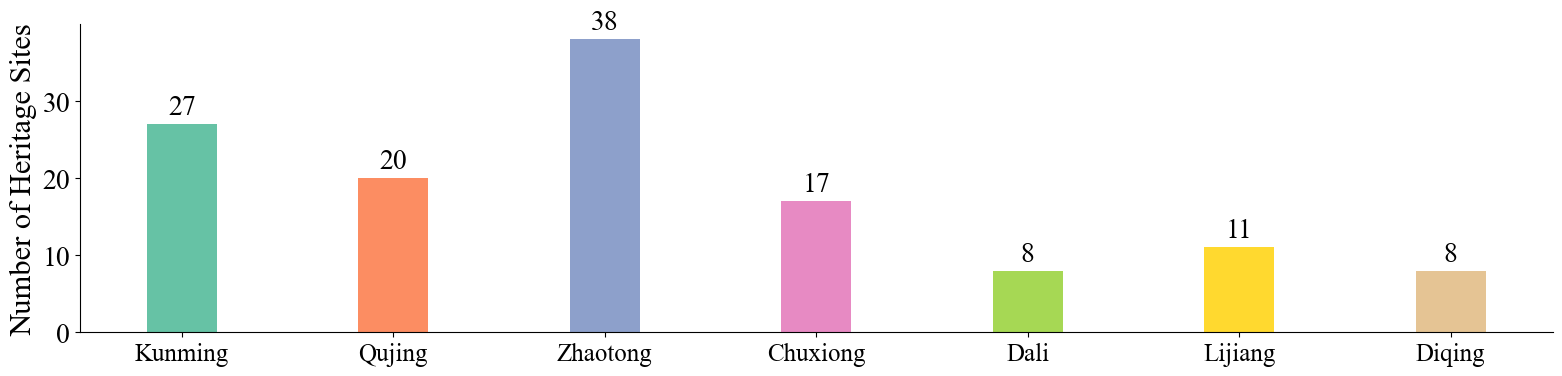

In [ ]:
# Êï∞ÈáèÂàÜÂ∏ÉÁªüËÆ°
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# ËÆæÁΩÆ‰∏≠ÊñáÂíåËã±ÊñáÂ≠ó‰Ωì
# zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

# ÂüéÂ∏ÇÈ°∫Â∫èÂíåÂØπÂ∫îÊôØÂå∫Êï∞Èáè
city_order = ['Kunming', 'Qujing', 'Zhaotong', 'Chuxiong', 'Dali', 'Lijiang', 'Diqing']
site_counts = [27, 20, 38, 17, 8, 11, 8]

# ÈÖçËâ≤ÊñπÊ°àÔºàSet2 Ë∞ÉËâ≤ÊùøÔºâ
palette = sns.color_palette("Set2", n_colors=len(city_order))
color_map = {city: palette[i] for i, city in enumerate(city_order)}
colors = [color_map[city] for city in city_order]

# ÂàõÂª∫ÂõæÂΩ¢
fig, ax = plt.subplots(figsize=(19, 4))

# ÁªòÂà∂Êü±Áä∂Âõæ
bars = ax.bar(city_order, site_counts, width=0.33, color=colors)

# ËÆæÁΩÆËΩ¥Ê†áÁ≠æÔºàÂä†Â§ßÂ≠ó‰ΩìÔºâ
ax.set_ylabel('Number of Heritage Sites', fontsize=22)
ax.set_xticks(range(len(city_order)))
ax.set_xticklabels(city_order, fontsize=18, rotation=0)
ax.tick_params(axis='y', labelsize=20)

# Ê∑ªÂä†Êü±Â§¥Êï¥Êï∞Ê†áÁ≠æ
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=20)

# ÈöêËóèÈ°∂ÈÉ®ÂíåÂè≥‰æßËæπÊ°Ü
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ËÆæÁΩÆËÉåÊôØÈÄèÊòé‰øùÂ≠ò
plt.savefig("ÈïøÂæÅÊôØÂå∫Êï∞Èáè.png", dpi=720, bbox_inches='tight', transparent=True)
plt.show()

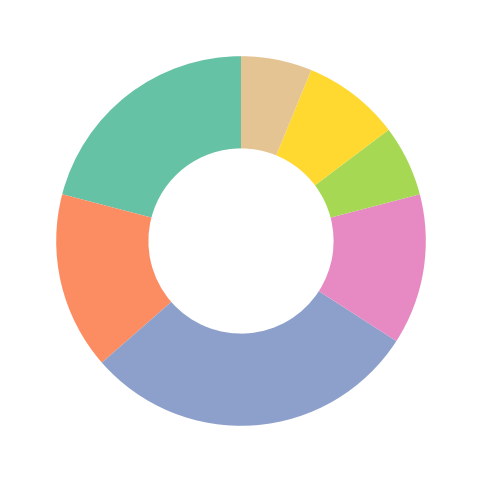

In [ ]:
# ÁîúÁîúÂúàÂõæ
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# ËÆæÁΩÆÂ≠ó‰Ωì
zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

# Êï∞ÊçÆ
city_order = ['ÊòÜÊòé', 'Êõ≤Èùñ', 'Êò≠ÈÄö', 'Ê•öÈõÑ', 'Â§ßÁêÜ', '‰∏ΩÊ±ü', 'Ëø™Â∫Ü']
site_counts = [27, 20, 38, 17, 8, 11, 8]

# È¢úËâ≤Êò†Â∞Ñ
palette = sns.color_palette("Set2", n_colors=len(city_order))
colors = [palette[i] for i in range(len(city_order))]

# ÁªòÂõæ
fig, ax = plt.subplots(figsize=(6, 6))

# ÁªòÂà∂ÈÄèÊòé‰∏≠ÂøÉÁîúÁîúÂúà
wedges, _ = ax.pie(
    site_counts,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.499, edgecolor='none')  # ÊéßÂà∂ÁîúÁîúÂúàÂéöÂ∫¶Ôºå‰∏≠ÂøÉÁõ¥Êé•ÈÄèÊòé
)

# ËÆæÁΩÆÁ≠âÊØî & ÂéªÈô§ÂùêÊ†áËΩ¥
ax.set(aspect="equal")
plt.axis('off')

# ‰øùÂ≠ò‰∏∫ÈÄèÊòéËÉåÊôØÂõæÔºàÂåÖÊã¨‰∏≠ÂøÉÁ©∫ÂøÉÔºâ
plt.savefig("ÈïøÂæÅÊôØÂå∫_ÁîúÁîúÂúàÂõæ_ÂÆåÂÖ®ÈÄèÊòé‰∏≠ÂøÉ.png", dpi=600, bbox_inches='tight', transparent=True)
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


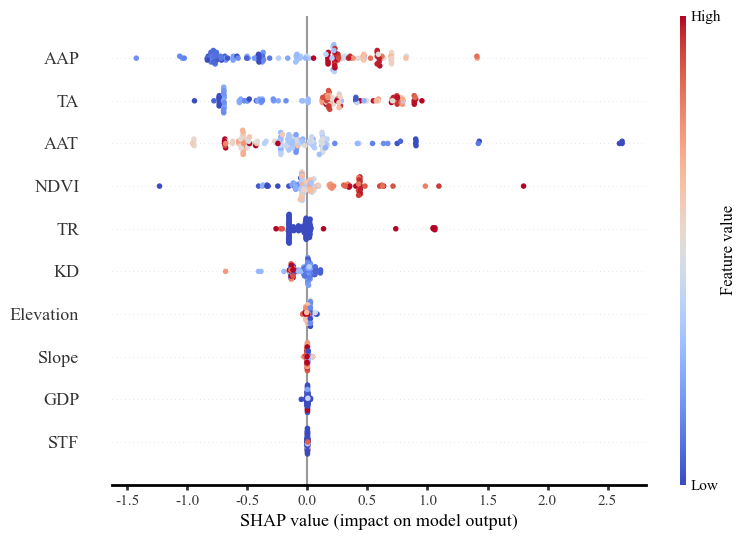

In [ ]:
# SHAPÂàÜÊûêÁÇπÂàÜÂ∏ÉÂõæ
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib.cm import ScalarMappable
from matplotlib import font_manager

# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
zh_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "TA", "KD", "GDP", "AAT",
    "NDVI", "AAP", "Elevation", "Slope", "TR", "STF"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["TA", "Slope"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# 4. Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# 5. Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# 6. KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# 7. XGBoostËÆ≠ÁªÉÔºåËÆ°ÁÆóÁâπÂæÅÊùÉÈáç
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)
feature_importances = xgb_model.feature_importances_

# 8. ËæìÂá∫ÁâπÂæÅÊùÉÈáçÔºàÊåâÂ§ßÂ∞èÊéíÂ∫èÔºâ
feature_weight_dict = dict(zip(selected_cols, feature_importances))
sorted_weights = sorted(feature_weight_dict.items(), key=lambda x: x[1], reverse=True)

# 9. Âä†ÊùÉÂæóÂàÜÔºà‰ΩøÁî® Min-Max Ê†áÂáÜÂåñÂêéÁöÑÊï∞ÊçÆÔºå‰∏çÊòØÂπ≥ÁßªÂêéÁöÑÔºâ
weighted_score = data_std @ feature_importances

# ‚úÖ ‰πò‰ª• 100 ÊîæÂ§ßÂæóÂàÜ
weighted_score = weighted_score * 100

# 10. Ê∑ªÂä†ÂæóÂàÜÂàóÂπ∂ÂÜôÂõûExcel
df["ÊÄªÂàÜÂÄº"] = weighted_score
df.to_excel(file_path, index=False)

# ‚Äî‚Äî‚Äî Êñ∞Â¢ûÔºöÂü∫‰∫éËÆ≠ÁªÉÂ•ΩÁöÑxgbÊ®°ÂûãÂÅöSHAPËß£Èáä ‚Äî‚Äî‚Äî
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄºÔºàÈáçË¶ÅÂ∫¶Ôºâ
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâÔºåÁ°Æ‰øùÈ°∂ÈÉ®ÊúÄÂ§ß
sorted_idx = np.argsort(mean_abs_shap)[::-1]
mean_abs_shap_sorted = mean_abs_shap[sorted_idx]
features_sorted = [features[i] for i in sorted_idx]

# ËÆæÁΩÆÈ¢úËâ≤Êù°Ôºà‰ªé‰ΩéÂà∞È´òÔºâ
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=np.min(mean_abs_shap_sorted), vmax=np.max(mean_abs_shap_sorted))

# ÂáÜÂ§áÁªòÂà∂Â§ö‰∏™ÂõæÂΩ¢
fig = plt.figure(figsize=(18, 14))

# ÁîªÂ∑¶‰æßÁöÑ‰∏ªË¶ÅÊù°ÂΩ¢ÂõæÂíåÂæÑÂêëÂõæÔºàaÈÉ®ÂàÜÔºâ
# ËÆæÁΩÆ‰∏ªÊù°ÂΩ¢Âõæ
ax_bar = fig.add_axes([0.08, 0.15, 0.6, 0.75])
bars = ax_bar.barh(
    features_sorted[::-1],           # ÂèçËΩ¨È°∫Â∫èÔºåÁ°Æ‰øùÊúÄÂ§ßÂÄºÂú®‰∏ä
    mean_abs_shap_sorted[::-1],      # ÂèçËΩ¨È°∫Â∫èÂØπÂ∫î
    color=ScalarMappable(cmap=cmap, norm=norm).to_rgba(mean_abs_shap_sorted[::-1]),  # ‰ΩøÁî®Ëâ≤ÂΩ©Êù°
    edgecolor='black',               # ÈªëËâ≤ËæπÊ°Ü
    linewidth=1.5
)

# Ê∑ªÂä†SHAPÂÄºÊ†áÁ≠æ
for bar, val in zip(bars, mean_abs_shap_sorted[::-1]):
    width = bar.get_width()
    ax_bar.text(
        width + 0.002,                # Á®çÂæÆÂêëÂè≥ÂÅèÁßª‰∏ÄÁÇπÔºåÈÅøÂÖçÈáçÂè†Êü±Â≠ê
        bar.get_y() + bar.get_height() / 2,
        f"{val:.3f}",
        ha='left', va='center',
        fontsize=16,
        color='black'
    )

# ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÂíåÊ†áÈ¢ò
ax_bar.set_xlabel("Mean Absolute SHAP Value", fontsize=18)
ax_bar.set_title("SHAP Feature Importance (Contribution to Model Output)", fontsize=22)

# ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†∑Âºè
ax_bar.set_yticks(np.arange(len(features_sorted)))
ax_bar.set_yticklabels(features_sorted[::-1], fontsize=16)
ax_bar.tick_params(axis='x', labelsize=19, width=0.1)  # Ë∞ÉÊï¥xËΩ¥ÂàªÂ∫¶Á∫øÁöÑÂÆΩÂ∫¶
ax_bar.xaxis.set_tick_params(width=0.2)  # Êõ¥Á≤æÁªÜÁöÑÊéßÂà∂xËΩ¥Á∫øÊù°ÁöÑÂÆΩÂ∫¶
ax_bar.spines['bottom'].set_linewidth(0.2)  # Ë∞ÉÊï¥xËΩ¥Ê°ÜÊû∂Á∫øÁöÑÁ≤óÁªÜ

# ËÆæÁΩÆËâ≤Êù°
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax_bar, orientation='vertical', fraction=0.4, pad=0.4)  # Â¢ûÂä†fractionÂíåpad‰ΩøËâ≤Êù°Êõ¥ÂÆΩ
cbar.set_label('Feature Value', size=16, labelpad=-41)  # Ë∞ÉÊï¥label‰ΩçÁΩÆÔºå‰ΩøÂÖ∂ÂêëÂ∑¶ÁßªÂä®

# ËÆæÁΩÆÂæÑÂêëÂõæÔºàÂÜÖÂµåÂõæÔºâ
ax_radial_inset = fig.add_axes([0.7, 0.55, 0.25, 0.25], polar=True)
angles = np.linspace(0, 2 * np.pi, len(features_sorted), endpoint=False).tolist()
angles += angles[:1]

ax_radial_inset.set_theta_offset(np.pi / 2)
ax_radial_inset.set_theta_direction(-1)
ax_radial_inset.set_ylim(0, max(mean_abs_shap_sorted))

for i in range(len(features_sorted)):
    ax_radial_inset.bar(angles[i], mean_abs_shap_sorted[i], width=0.3, color=ScalarMappable(cmap=cmap, norm=norm).to_rgba(mean_abs_shap_sorted[i]))

ax_radial_inset.set_xticks(angles[:-1])
ax_radial_inset.set_xticklabels(features_sorted, fontsize=10)

# ÁîªÂè≥‰æßSHAPÊëòË¶ÅÂõæÔºàbÈÉ®ÂàÜÔºâ
ax_beeswarm = fig.add_axes([0.77, 0.15, 0.2, 0.75])  # ËÆæÁΩÆÂè≥‰æßÊëòË¶ÅÂõæÁöÑ‰ΩçÁΩÆ
shap.summary_plot(shap_values, data, plot_type="dot", show=False, cmap=cmap, max_display=10)

# ËÆæÁΩÆÂè≥‰æßSHAPÊëòË¶ÅÂõæÁöÑÊ†áÈ¢ò
ax_beeswarm.set_title("(b)", fontsize=30, weight='bold', ha='right', va='top')

# ‰øùÂ≠òÊúÄÁªàÂõæÂÉè
plt.tight_layout()
plt.savefig("shap_feature_importance_combined_style.png", dpi=720)
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


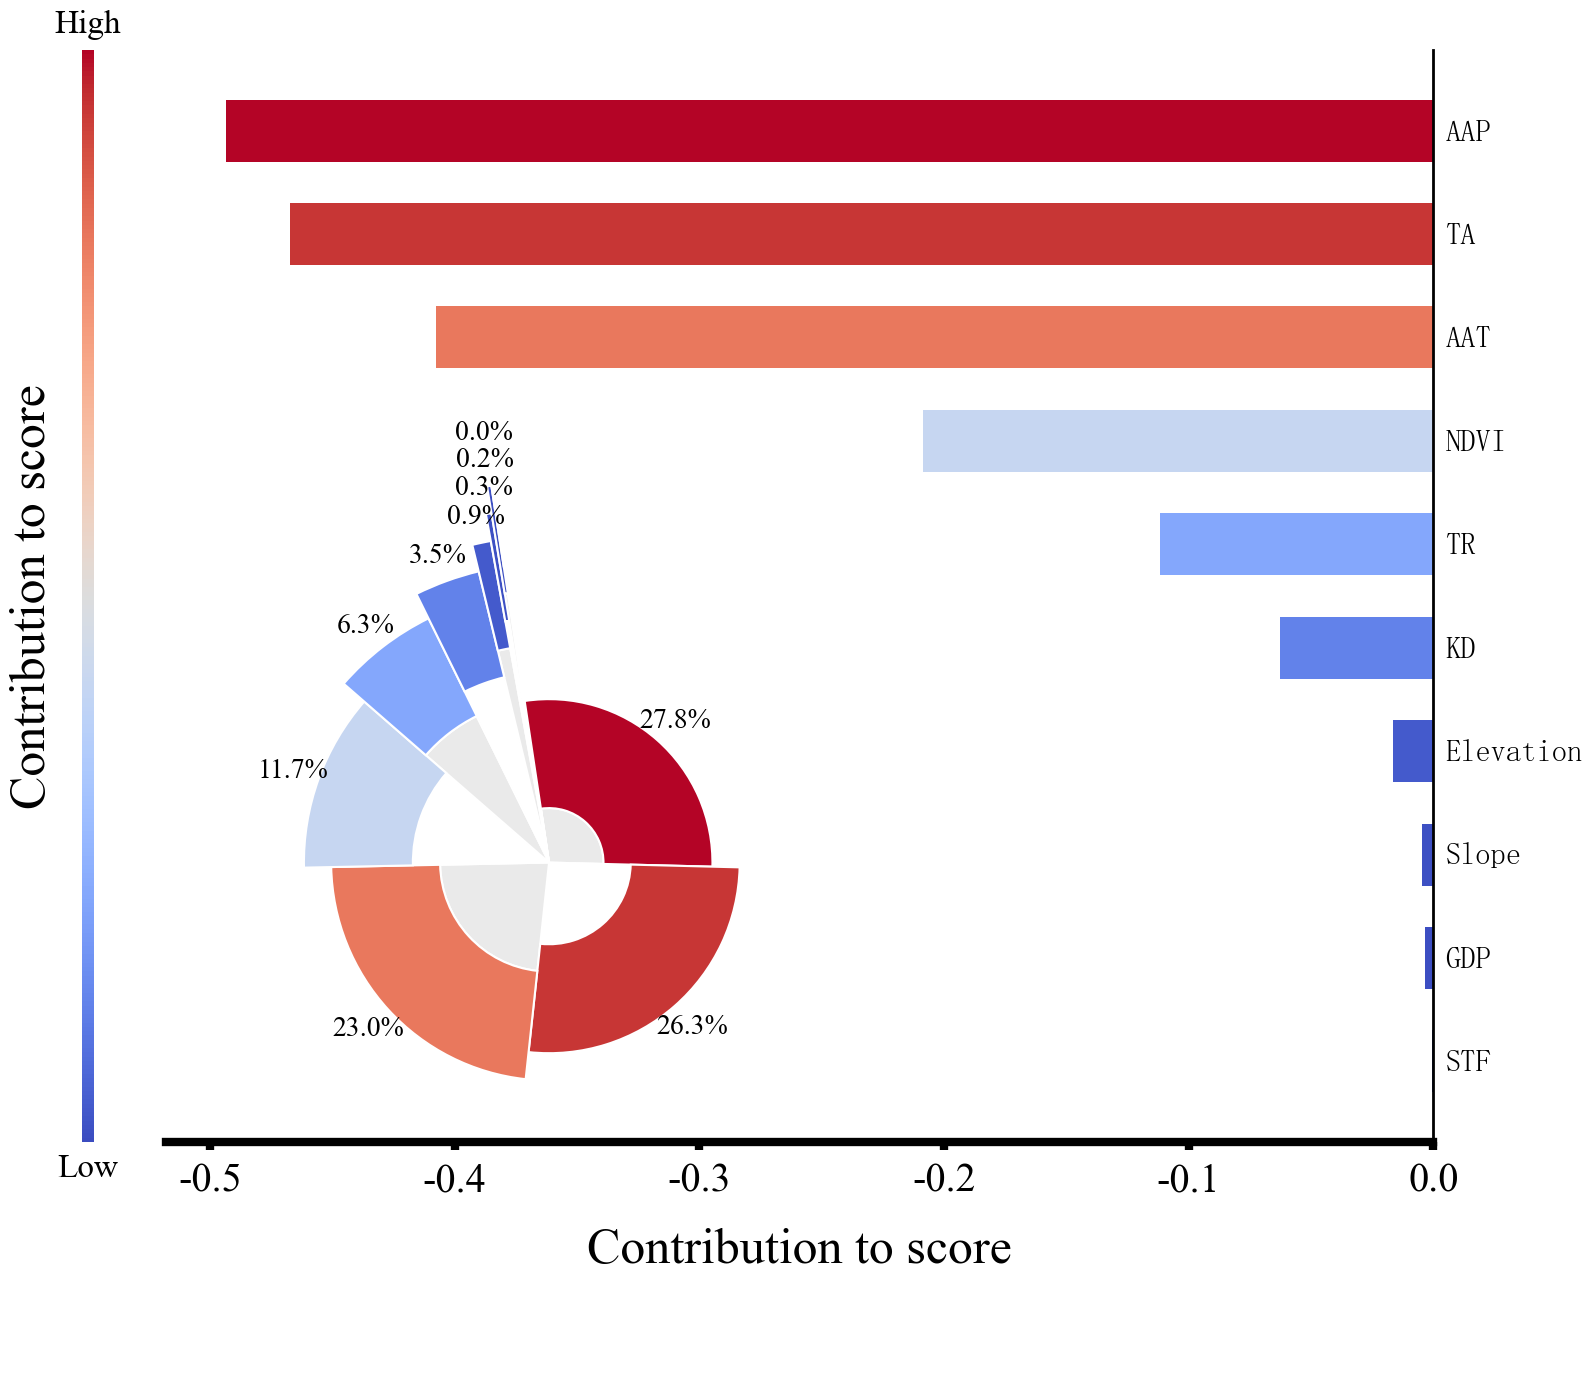

In [ ]:
# Ê∑∑ÂêàÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûêÁé´Áë∞Âõæ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable
import shap
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm

# ===================================================================
# 1. Êï∞ÊçÆÂáÜÂ§áÈÉ®ÂàÜÔºà‰øùÊåÅÂéüÊ†∑Ôºâ
# ===================================================================
# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
zh_font = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = ["TA", "KD", "GDP", "AAT", "NDVI", "AAP", "Elevation", "Slope", "TR", "STF"]
data = df[selected_cols].copy()

# Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["TA", "Slope"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# XGBoostËÆ≠ÁªÉ
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)

# SHAPÂàÜÊûê
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄº
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâ
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_shap_values = mean_abs_shap[sorted_idx]
sorted_features = [features[i] for i in sorted_idx]

# ===================================================================
# 2. ÂèØËßÜÂåñÈÉ®ÂàÜÔºàÊåâÁÖßÂèÇËÄÉÂõæÊ†∑ÂºèÊîπÈÄ†Ôºâ
# ===================================================================
# ÂÖ®Â±ÄËÆæÁΩÆ
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

# ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºà‰ΩøÁî® coolwarm Ëâ≤ÂõæÔºâ
cmap = plt.get_cmap('coolwarm')  # ‰ΩøÁî® coolwarm Ëâ≤Âõæ
color_norm = mcolors.Normalize(vmin=min(sorted_shap_values), vmax=max(sorted_shap_values))
colors = [cmap(color_norm(val)) for val in sorted_shap_values]

# ÂàõÂª∫ÁîªÂ∏É
fig = plt.figure(figsize=(24, 14))

# =======================================================
# Â∑¶Âõæ (a): ÁªÑÂêàÊù°ÂΩ¢ÂõæÂíåÂæÑÂêëÂõæ
# =======================================================
# ÂÆö‰πâÂ∏ÉÂ±ÄÂèÇÊï∞
left_margin, right_margin = 0.05, 0.05
bottom_margin, top_margin = 0.12, 0.1
space_between = 0.02
plot_bottom = bottom_margin
plot_height = 1 - bottom_margin - top_margin
total_plot_width = 1 - left_margin - right_margin - space_between
left_plot_width = total_plot_width * 0.6

# 1. È¢úËâ≤Êù°
cbar_left = left_margin
colorbar_width = 0.005
ax_cbar = fig.add_axes([cbar_left, plot_bottom, colorbar_width, plot_height])
sm = ScalarMappable(cmap=cmap, norm=color_norm)
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('', size=24, labelpad=5)
cbar.set_ticks([])  # ÈöêËóèËâ≤Êù°ÁöÑ ticks
cbar.ax.yaxis.set_ticks_position('left')
ax_cbar.text(0.5, 1.01, 'High', transform=ax_cbar.transAxes, 
             ha='center', va='bottom', fontsize=24)
ax_cbar.text(0.5, -0.01, 'Low', transform=ax_cbar.transAxes, 
             ha='center', va='top', fontsize=24)
cbar.outline.set_visible(False)
ax_cbar.text(-6, 0.5, 'Contribution to score', 
             transform=ax_cbar.transAxes, fontsize=36, rotation=90, va='center')

# 2. ‰∏ªÊù°ÂΩ¢Âõæ
main_ax_left = cbar_left + colorbar_width + 0.03
ax_bar = fig.add_axes([main_ax_left, plot_bottom, left_plot_width, plot_height])

# ‰∫§Êç¢Êü±Áä∂ÂõæÁöÑÊñπÂêëÔºå‰ªéÂè≥ÂêëÂ∑¶ÊòæÁ§∫
ax_bar.barh(y=range(len(sorted_features)), width=-np.array(sorted_shap_values), 
            color=colors, height=0.6)
ax_bar.invert_yaxis()
ax_bar.set_xlabel('Contribution to score', size=36, labelpad=20)
ax_bar.set_yticks([])  # ÂéªÈô§YËΩ¥ÊñáÂ≠óÊ†áÁ≠æ
ax_bar.spines[['left', 'top']].set_visible(False)
ax_bar.spines['right'].set_position(('data', 0))
ax_bar.spines['right'].set_visible(True)
ax_bar.spines['bottom'].set_visible(True)
ax_bar.tick_params(axis='x', which='major', labelsize=29, length=6, pad=8)

# --- Âä†Á≤óxËΩ¥Á∫øÊù° ---
ax_bar.spines['bottom'].set_linewidth(6)  # Êõ¥Á≤óÁöÑxËΩ¥Á∫øÊù°

# ËÆæÁΩÆÂàªÂ∫¶Á∫øÂÆΩÂ∫¶
ax_bar.tick_params(axis='x', width=6)  # Êõ¥Á≤óÁöÑxËΩ¥ÂàªÂ∫¶Á∫ø

# Ê∑ªÂä†ÁâπÂæÅÊ†áÁ≠æ
label_x_padding = 0.005
for i, feature in enumerate(sorted_features):
    ax_bar.text(label_x_padding, i, feature, ha='left', va='center', 
                color='black', fontsize=22, fontproperties=zh_font)

# 3. ÂæÑÂêëÂõæ
inset_size = min(left_plot_width, plot_height) * 1.4
inset_left = main_ax_left - 0.21
inset_bottom = plot_bottom - 0.17
ax_radial = fig.add_axes([inset_left, inset_bottom, inset_size, inset_size], 
                         projection='polar')
ax_radial.patch.set_alpha(0)

# ËÆ°ÁÆóÁôæÂàÜÊØîÂíåËßíÂ∫¶
percentages = (sorted_shap_values / sorted_shap_values.sum()) * 100
widths = (sorted_shap_values / sorted_shap_values.sum()) * 2 * np.pi
num_vars = len(sorted_features)
base_length, fixed_increment, colored_ring_width = 3.0, 0.5, 2.0
total_lengths = [base_length + i * fixed_increment for i in range(num_vars)]
inner_heights = [max(0, tl - colored_ring_width) for tl in total_lengths]
inner_colors = ['#EAEAEA', '#FFFFFF'] * (num_vars // 2 + 1)
inner_colors = inner_colors[:num_vars]
thetas = np.cumsum([0] + widths[:-1].tolist()) - np.pi/21

# ÁªòÂà∂ÂæÑÂêëÂõæ
ax_radial.bar(x=thetas, height=inner_heights, width=widths, 
              color=inner_colors, align='edge', edgecolor='white', linewidth=1.5)
ax_radial.bar(x=thetas, height=[colored_ring_width]*num_vars, width=widths, 
              bottom=inner_heights, color=colors, align='edge', edgecolor='white', linewidth=1.5)

# Ê∑ªÂä†ÁôæÂàÜÊØîÊ†áÁ≠æ
for i in range(num_vars):
    label_angle = thetas[i] + widths[i]/2
    label_radius = total_lengths[i] + 0.5
    ax_radial.text(label_angle, label_radius, f'{percentages[i]:.1f}%', 
                   ha='center', va='center', fontsize=20)

ax_radial.set_yticks([])  # ÂéªÈô§YËΩ¥ÂàªÂ∫¶
ax_radial.set_yticklabels([])  # ÂéªÈô§YËΩ¥Ê†áÁ≠æ
ax_radial.set_xticklabels([])
ax_radial.spines['polar'].set_visible(False)
ax_radial.grid(False)
ax_radial.set_theta_zero_location('N')
ax_radial.set_theta_direction(-1)
ax_radial.set_ylim(0, max(total_lengths) + 2)

# =======================================================
# ‰øùÂ≠òÂíåÊòæÁ§∫
# =======================================================
plt.savefig("combined_shap_plot_updated_with_coolwarm.png", dpi=600, bbox_inches='tight')
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


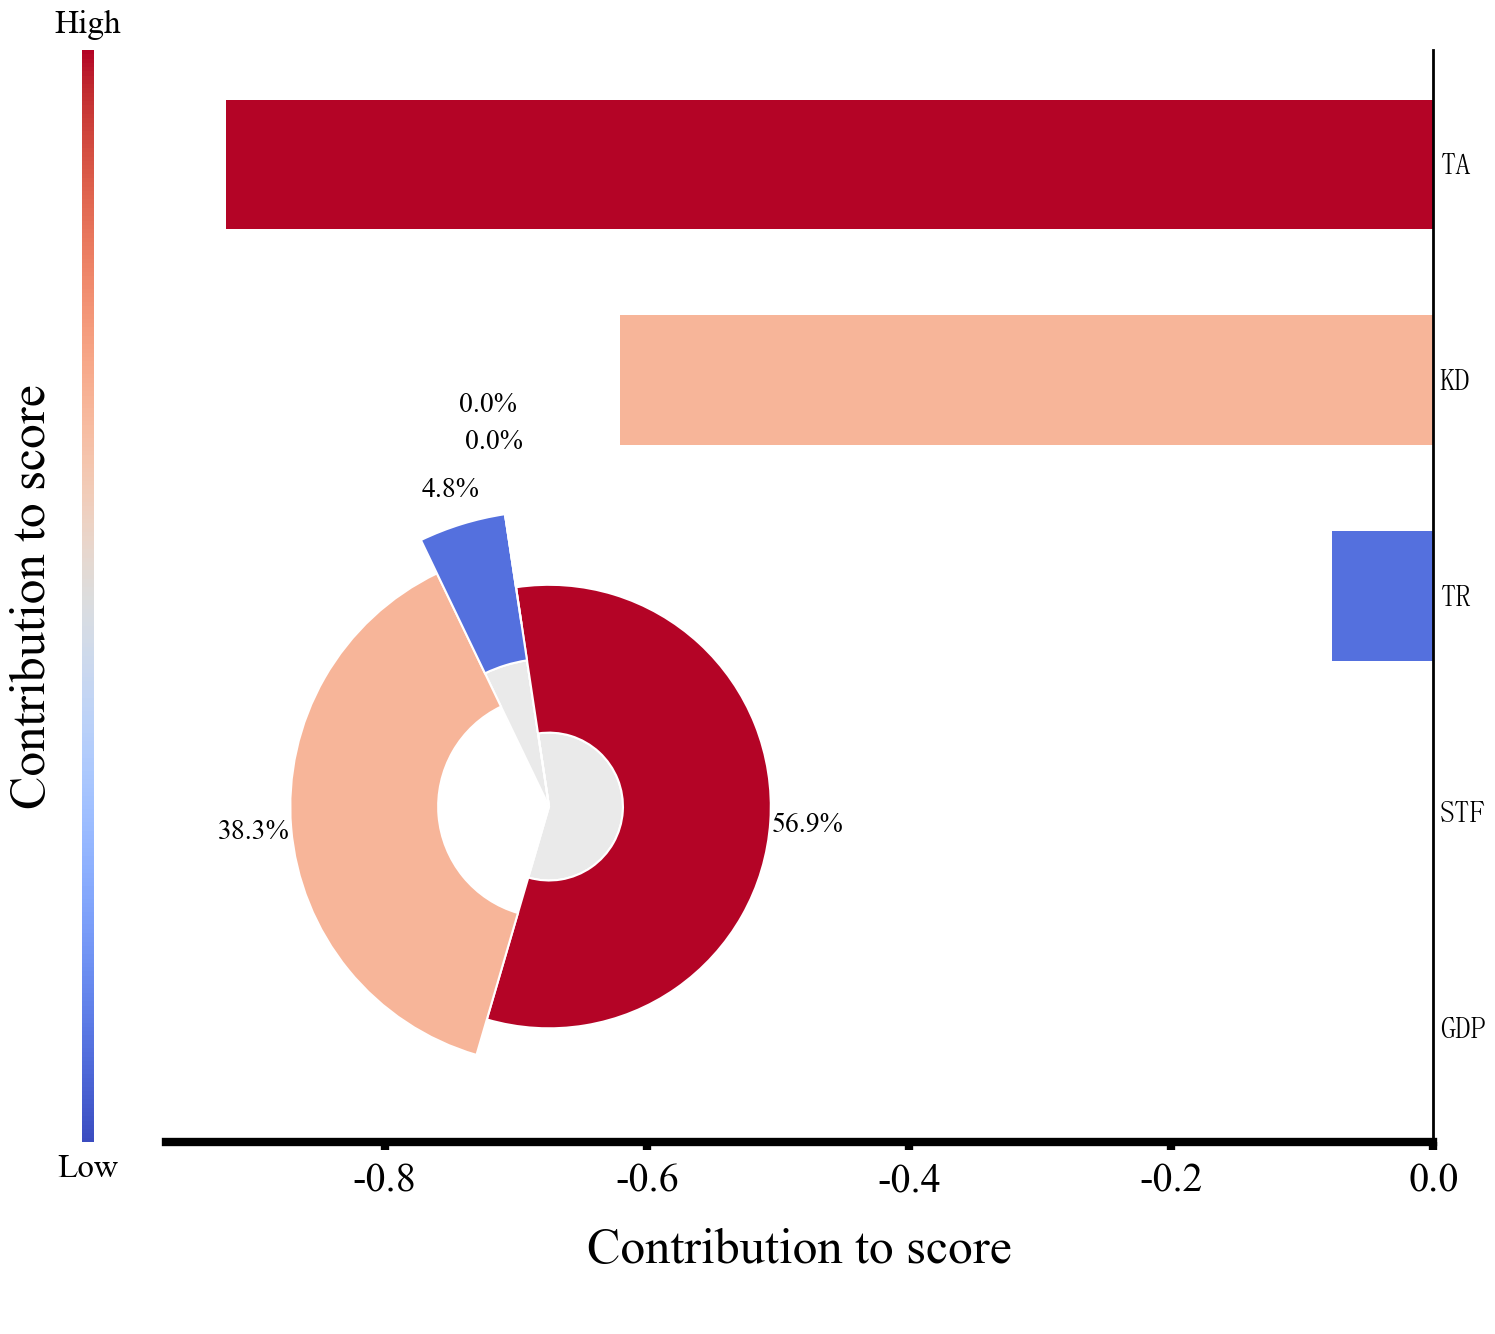

In [ ]:
# Á§æ‰ºöÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûêÁé´Áë∞Âõæ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable
import shap
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm

# ===================================================================
# 1. Êï∞ÊçÆÂáÜÂ§áÈÉ®ÂàÜÔºà‰øùÊåÅÂéüÊ†∑Ôºâ
# ===================================================================
# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
zh_font = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "TA", "KD", "GDP", "TR", "STF"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["TA"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# XGBoostËÆ≠ÁªÉ
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)

# SHAPÂàÜÊûê
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄº
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâ
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_shap_values = mean_abs_shap[sorted_idx]
sorted_features = [features[i] for i in sorted_idx]

# ===================================================================
# 2. ÂèØËßÜÂåñÈÉ®ÂàÜÔºàÊåâÁÖßÂèÇËÄÉÂõæÊ†∑ÂºèÊîπÈÄ†Ôºâ
# ===================================================================
# ÂÖ®Â±ÄËÆæÁΩÆ
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

# ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºà‰ΩøÁî® coolwarm Ëâ≤ÂõæÔºâ
cmap = plt.get_cmap('coolwarm')  # ‰ΩøÁî® coolwarm Ëâ≤Âõæ
color_norm = mcolors.Normalize(vmin=min(sorted_shap_values), vmax=max(sorted_shap_values))
colors = [cmap(color_norm(val)) for val in sorted_shap_values]

# ÂàõÂª∫ÁîªÂ∏É
fig = plt.figure(figsize=(24, 14))

# =======================================================
# Â∑¶Âõæ (a): ÁªÑÂêàÊù°ÂΩ¢ÂõæÂíåÂæÑÂêëÂõæ
# =======================================================
# ÂÆö‰πâÂ∏ÉÂ±ÄÂèÇÊï∞
left_margin, right_margin = 0.05, 0.05
bottom_margin, top_margin = 0.12, 0.1
space_between = 0.02
plot_bottom = bottom_margin
plot_height = 1 - bottom_margin - top_margin
total_plot_width = 1 - left_margin - right_margin - space_between
left_plot_width = total_plot_width * 0.6

# 1. È¢úËâ≤Êù°
cbar_left = left_margin
colorbar_width = 0.005
ax_cbar = fig.add_axes([cbar_left, plot_bottom, colorbar_width, plot_height])
sm = ScalarMappable(cmap=cmap, norm=color_norm)
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('', size=24, labelpad=5)
cbar.set_ticks([])  # ÈöêËóèËâ≤Êù°ÁöÑ ticks
cbar.ax.yaxis.set_ticks_position('left')
ax_cbar.text(0.5, 1.01, 'High', transform=ax_cbar.transAxes, 
             ha='center', va='bottom', fontsize=24)
ax_cbar.text(0.5, -0.01, 'Low', transform=ax_cbar.transAxes, 
             ha='center', va='top', fontsize=24)
cbar.outline.set_visible(False)
ax_cbar.text(-6, 0.5, 'Contribution to score', 
             transform=ax_cbar.transAxes, fontsize=36, rotation=90, va='center')

# 2. ‰∏ªÊù°ÂΩ¢Âõæ
main_ax_left = cbar_left + colorbar_width + 0.03
ax_bar = fig.add_axes([main_ax_left, plot_bottom, left_plot_width, plot_height])

# ‰∫§Êç¢Êü±Áä∂ÂõæÁöÑÊñπÂêëÔºå‰ªéÂè≥ÂêëÂ∑¶ÊòæÁ§∫
ax_bar.barh(y=range(len(sorted_features)), width=-np.array(sorted_shap_values), 
            color=colors, height=0.6)
ax_bar.invert_yaxis()
ax_bar.set_xlabel('Contribution to score', size=36, labelpad=20)
ax_bar.set_yticks([])  # ÂéªÈô§YËΩ¥ÊñáÂ≠óÊ†áÁ≠æ
ax_bar.spines[['left', 'top']].set_visible(False)
ax_bar.spines['right'].set_position(('data', 0))
ax_bar.spines['right'].set_visible(True)
ax_bar.spines['bottom'].set_visible(True)
ax_bar.tick_params(axis='x', which='major', labelsize=29, length=6, pad=8)

# --- Âä†Á≤óxËΩ¥Á∫øÊù° ---
ax_bar.spines['bottom'].set_linewidth(6)  # Êõ¥Á≤óÁöÑxËΩ¥Á∫øÊù°

# ËÆæÁΩÆÂàªÂ∫¶Á∫øÂÆΩÂ∫¶
ax_bar.tick_params(axis='x', width=6)  # Êõ¥Á≤óÁöÑxËΩ¥ÂàªÂ∫¶Á∫ø

# Ê∑ªÂä†ÁâπÂæÅÊ†áÁ≠æ
label_x_padding = 0.005
for i, feature in enumerate(sorted_features):
    ax_bar.text(label_x_padding, i, feature, ha='left', va='center', 
                color='black', fontsize=22, fontproperties=zh_font)

# 3. ÂæÑÂêëÂõæ
inset_size = min(left_plot_width, plot_height) * 1.4
inset_left = main_ax_left - 0.21
inset_bottom = plot_bottom - 0.13
ax_radial = fig.add_axes([inset_left, inset_bottom, inset_size, inset_size], 
                         projection='polar')
ax_radial.patch.set_alpha(0)

# ËÆ°ÁÆóÁôæÂàÜÊØîÂíåËßíÂ∫¶
percentages = (sorted_shap_values / sorted_shap_values.sum()) * 100
widths = (sorted_shap_values / sorted_shap_values.sum()) * 2 * np.pi
num_vars = len(sorted_features)
base_length, fixed_increment, colored_ring_width = 3.0, 0.5, 2.0
total_lengths = [base_length + i * fixed_increment for i in range(num_vars)]
inner_heights = [max(0, tl - colored_ring_width) for tl in total_lengths]
inner_colors = ['#EAEAEA', '#FFFFFF'] * (num_vars // 2 + 1)
inner_colors = inner_colors[:num_vars]
thetas = np.cumsum([0] + widths[:-1].tolist()) - np.pi/21

# ÁªòÂà∂ÂæÑÂêëÂõæ
ax_radial.bar(x=thetas, height=inner_heights, width=widths, 
              color=inner_colors, align='edge', edgecolor='white', linewidth=1.5)
ax_radial.bar(x=thetas, height=[colored_ring_width]*num_vars, width=widths, 
              bottom=inner_heights, color=colors, align='edge', edgecolor='white', linewidth=1.5)

# Ê∑ªÂä†ÁôæÂàÜÊØîÊ†áÁ≠æ
for i in range(num_vars):
    label_angle = thetas[i] + widths[i]/2
    label_radius = total_lengths[i] + 0.5
    ax_radial.text(label_angle, label_radius, f'{percentages[i]:.1f}%', 
                   ha='center', va='center', fontsize=20)

ax_radial.set_yticks([])  # ÂéªÈô§YËΩ¥ÂàªÂ∫¶
ax_radial.set_yticklabels([])  # ÂéªÈô§YËΩ¥Ê†áÁ≠æ
ax_radial.set_xticklabels([])
ax_radial.spines['polar'].set_visible(False)
ax_radial.grid(False)
ax_radial.set_theta_zero_location('N')
ax_radial.set_theta_direction(-1)
ax_radial.set_ylim(0, max(total_lengths) + 2)

# =======================================================
# ‰øùÂ≠òÂíåÊòæÁ§∫
# =======================================================
plt.savefig("combined_shap_plot_updated_with_coolwarm.png", dpi=300, bbox_inches='tight')
plt.show()

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


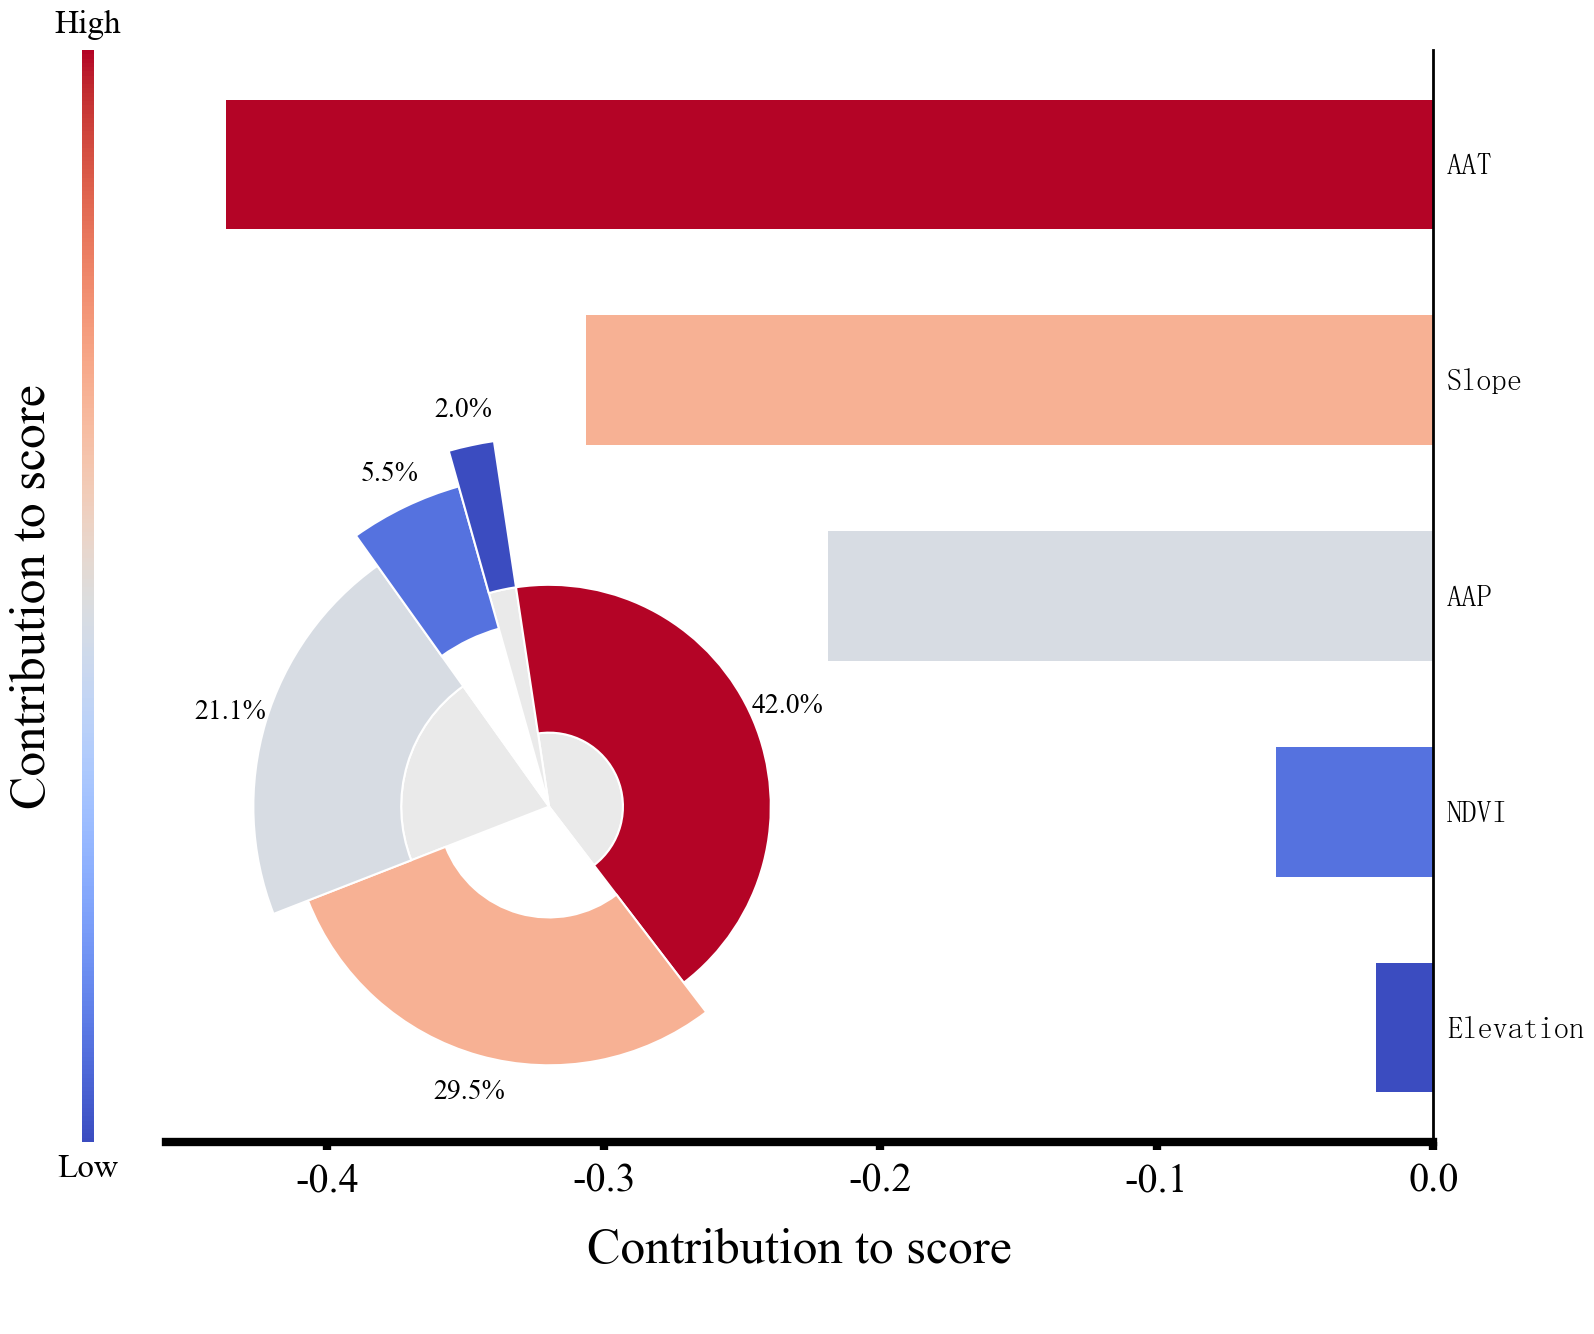

In [ ]:
# ÁîüÊÄÅÊ®°ÂºèÊåáÊ†áSHAPÂàÜÊûêÁé´Áë∞Âõæ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable
import shap
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm

# ===================================================================
# 1. Êï∞ÊçÆÂáÜÂ§áÈÉ®ÂàÜÔºà‰øùÊåÅÂéüÊ†∑Ôºâ
# ===================================================================
# ËÆæÁΩÆÂ≠ó‰ΩìÔºö‰∏≠ÊñáÂÆã‰Ωì + Ëã±Êñá Times New Roman
zh_font = fm.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  # ÂÆã‰Ωì
plt.rcParams['font.family'] = 'Times New Roman'  # Ëã±Êñá
plt.rcParams['axes.unicode_minus'] = False  # Ë¥üÂè∑

# 1. ËØªÂèñÊï∞ÊçÆ
file_path = r"C:\Users\leishen\Desktop\sample.xlsx"
df = pd.read_excel(file_path)

# 2. ÈÄâÊã©ÊåáÂÆöÂàó
selected_cols = [
    "AAT", "NDVI", "AAP", "Elevation", "Slope"
]
data = df[selected_cols].copy()

# 3. Ë¥üÂêëÊåáÊ†áÊ≠£ÂêëÂåñÔºà‰∫§ÈÄöÂèØËææÊÄß„ÄÅÂù°Â∫¶Ôºâ
neg_cols = ["Slope"]
for col in neg_cols:
    data[col] = data[col].max() - data[col]

# Min-Max Ê†áÂáÜÂåñÔºàÁº©ÊîæÂà∞0~1Ôºâ
scaler = MinMaxScaler()
data_std = scaler.fit_transform(data)

# Âπ≥ÁßªÂ§ÑÁêÜÔºàÊï¥‰Ωì+1Ôºå‰ΩøÂÖ∂Âèò‰∏∫ 1~2 ËåÉÂõ¥Ôºâ
data_shifted = data_std + 1

# KMeansËÅöÁ±ªÂàÜÁ∫ßÔºàÁ≠âÁ∫ßÔºö1~5Ôºâ
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_shifted)
cluster_labels = clusters + 1  # Ê†áÁ≠æ‰ªé1~5

# XGBoostËÆ≠ÁªÉ
xgb_model = XGBRegressor(n_estimators=100, random_state=41)
xgb_model.fit(data_shifted, cluster_labels)

# SHAPÂàÜÊûê
explainer = shap.Explainer(xgb_model)
shap_values = explainer(data_shifted)

# ËÆ°ÁÆóÊØè‰∏™ÁâπÂæÅÁöÑÂπ≥ÂùáÁªùÂØπSHAPÂÄº
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = selected_cols

# ÊéíÂ∫èÔºàÈôçÂ∫èÔºâ
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_shap_values = mean_abs_shap[sorted_idx]
sorted_features = [features[i] for i in sorted_idx]

# ===================================================================
# 2. ÂèØËßÜÂåñÈÉ®ÂàÜÔºàÊåâÁÖßÂèÇËÄÉÂõæÊ†∑ÂºèÊîπÈÄ†Ôºâ
# ===================================================================
# ÂÖ®Â±ÄËÆæÁΩÆ
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

# ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºà‰ΩøÁî® coolwarm Ëâ≤ÂõæÔºâ
cmap = plt.get_cmap('coolwarm')  # ‰ΩøÁî® coolwarm Ëâ≤Âõæ
color_norm = mcolors.Normalize(vmin=min(sorted_shap_values), vmax=max(sorted_shap_values))
colors = [cmap(color_norm(val)) for val in sorted_shap_values]

# ÂàõÂª∫ÁîªÂ∏É
fig = plt.figure(figsize=(24, 14))

# =======================================================
# Â∑¶Âõæ (a): ÁªÑÂêàÊù°ÂΩ¢ÂõæÂíåÂæÑÂêëÂõæ
# =======================================================
# ÂÆö‰πâÂ∏ÉÂ±ÄÂèÇÊï∞
left_margin, right_margin = 0.05, 0.05
bottom_margin, top_margin = 0.12, 0.1
space_between = 0.02
plot_bottom = bottom_margin
plot_height = 1 - bottom_margin - top_margin
total_plot_width = 1 - left_margin - right_margin - space_between
left_plot_width = total_plot_width * 0.6

# 1. È¢úËâ≤Êù°
cbar_left = left_margin
colorbar_width = 0.005
ax_cbar = fig.add_axes([cbar_left, plot_bottom, colorbar_width, plot_height])
sm = ScalarMappable(cmap=cmap, norm=color_norm)
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('', size=24, labelpad=5)
cbar.set_ticks([])  # ÈöêËóèËâ≤Êù°ÁöÑ ticks
cbar.ax.yaxis.set_ticks_position('left')
ax_cbar.text(0.5, 1.01, 'High', transform=ax_cbar.transAxes, 
             ha='center', va='bottom', fontsize=24)
ax_cbar.text(0.5, -0.01, 'Low', transform=ax_cbar.transAxes, 
             ha='center', va='top', fontsize=24)
cbar.outline.set_visible(False)
ax_cbar.text(-6, 0.5, 'Contribution to score', 
             transform=ax_cbar.transAxes, fontsize=36, rotation=90, va='center')

# 2. ‰∏ªÊù°ÂΩ¢Âõæ
main_ax_left = cbar_left + colorbar_width + 0.03
ax_bar = fig.add_axes([main_ax_left, plot_bottom, left_plot_width, plot_height])

# ‰∫§Êç¢Êü±Áä∂ÂõæÁöÑÊñπÂêëÔºå‰ªéÂè≥ÂêëÂ∑¶ÊòæÁ§∫
ax_bar.barh(y=range(len(sorted_features)), width=-np.array(sorted_shap_values), 
            color=colors, height=0.6)
ax_bar.invert_yaxis()
ax_bar.set_xlabel('Contribution to score', size=36, labelpad=20)
ax_bar.set_yticks([])  # ÂéªÈô§YËΩ¥ÊñáÂ≠óÊ†áÁ≠æ
ax_bar.spines[['left', 'top']].set_visible(False)
ax_bar.spines['right'].set_position(('data', 0))
ax_bar.spines['right'].set_visible(True)
ax_bar.spines['bottom'].set_visible(True)
ax_bar.tick_params(axis='x', which='major', labelsize=29, length=6, pad=8)

# --- Âä†Á≤óxËΩ¥Á∫øÊù° ---
ax_bar.spines['bottom'].set_linewidth(6)  # Êõ¥Á≤óÁöÑxËΩ¥Á∫øÊù°

# ËÆæÁΩÆÂàªÂ∫¶Á∫øÂÆΩÂ∫¶
ax_bar.tick_params(axis='x', width=6)  # Êõ¥Á≤óÁöÑxËΩ¥ÂàªÂ∫¶Á∫ø

# Ê∑ªÂä†ÁâπÂæÅÊ†áÁ≠æ
label_x_padding = 0.005
for i, feature in enumerate(sorted_features):
    ax_bar.text(label_x_padding, i, feature, ha='left', va='center', 
                color='black', fontsize=22, fontproperties=zh_font)

# 3. ÂæÑÂêëÂõæ
inset_size = min(left_plot_width, plot_height) * 1.4
inset_left = main_ax_left - 0.21
inset_bottom = plot_bottom - 0.13
ax_radial = fig.add_axes([inset_left, inset_bottom, inset_size, inset_size], 
                         projection='polar')
ax_radial.patch.set_alpha(0)

# ËÆ°ÁÆóÁôæÂàÜÊØîÂíåËßíÂ∫¶
percentages = (sorted_shap_values / sorted_shap_values.sum()) * 100
widths = (sorted_shap_values / sorted_shap_values.sum()) * 2 * np.pi
num_vars = len(sorted_features)
base_length, fixed_increment, colored_ring_width = 3.0, 0.5, 2.0
total_lengths = [base_length + i * fixed_increment for i in range(num_vars)]
inner_heights = [max(0, tl - colored_ring_width) for tl in total_lengths]
inner_colors = ['#EAEAEA', '#FFFFFF'] * (num_vars // 2 + 1)
inner_colors = inner_colors[:num_vars]
thetas = np.cumsum([0] + widths[:-1].tolist()) - np.pi/21

# ÁªòÂà∂ÂæÑÂêëÂõæ
ax_radial.bar(x=thetas, height=inner_heights, width=widths, 
              color=inner_colors, align='edge', edgecolor='white', linewidth=1.5)
ax_radial.bar(x=thetas, height=[colored_ring_width]*num_vars, width=widths, 
              bottom=inner_heights, color=colors, align='edge', edgecolor='white', linewidth=1.5)

# Ê∑ªÂä†ÁôæÂàÜÊØîÊ†áÁ≠æ
for i in range(num_vars):
    label_angle = thetas[i] + widths[i]/2
    label_radius = total_lengths[i] + 0.5
    ax_radial.text(label_angle, label_radius, f'{percentages[i]:.1f}%', 
                   ha='center', va='center', fontsize=20)

ax_radial.set_yticks([])  # ÂéªÈô§YËΩ¥ÂàªÂ∫¶
ax_radial.set_yticklabels([])  # ÂéªÈô§YËΩ¥Ê†áÁ≠æ
ax_radial.set_xticklabels([])
ax_radial.spines['polar'].set_visible(False)
ax_radial.grid(False)
ax_radial.set_theta_zero_location('N')
ax_radial.set_theta_direction(-1)
ax_radial.set_ylim(0, max(total_lengths) + 2)

# =======================================================
# ‰øùÂ≠òÂíåÊòæÁ§∫
# =======================================================
plt.savefig("combined_shap_plot_updated_with_coolwarm.png", dpi=300, bbox_inches='tight')
plt.show()